# Tutorials

This notebook contains five tutorial examples to demonstrate the functionality of elasto-plastic models based on kinematic and isotropic hardening.

## Directions to use

Please run code blocks one by one as they appear to ensure the proper functionality of this notebook. At the very least, please run the first code block that imports the elasto-plastic module and other required packages before running the subsequent tutorial example code blocks.

In [1]:
'''
This code block imports the elasto-plasticity module and the required packages which will be required 
for the functioning of tutorial examples.
'''
from elastoplasticity import elasto_plasticity as ep
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

ModuleNotFoundError: No module named 'elastoplasticity'

## Example 1: Lecture Example

This example validates the functionality of elasto-plasticity module. The results can be compared with the class example. Please visit [Piazza](https://cdn-uploads.piazza.com/paste/k7mp12pmibt1h5/b5b1c1452bb2d319f8da45dc127c5bf8422307ff85d4ae549bb49639fc9a64bd/Copy_of_Lecture_6_Blank.pdf) to verify.

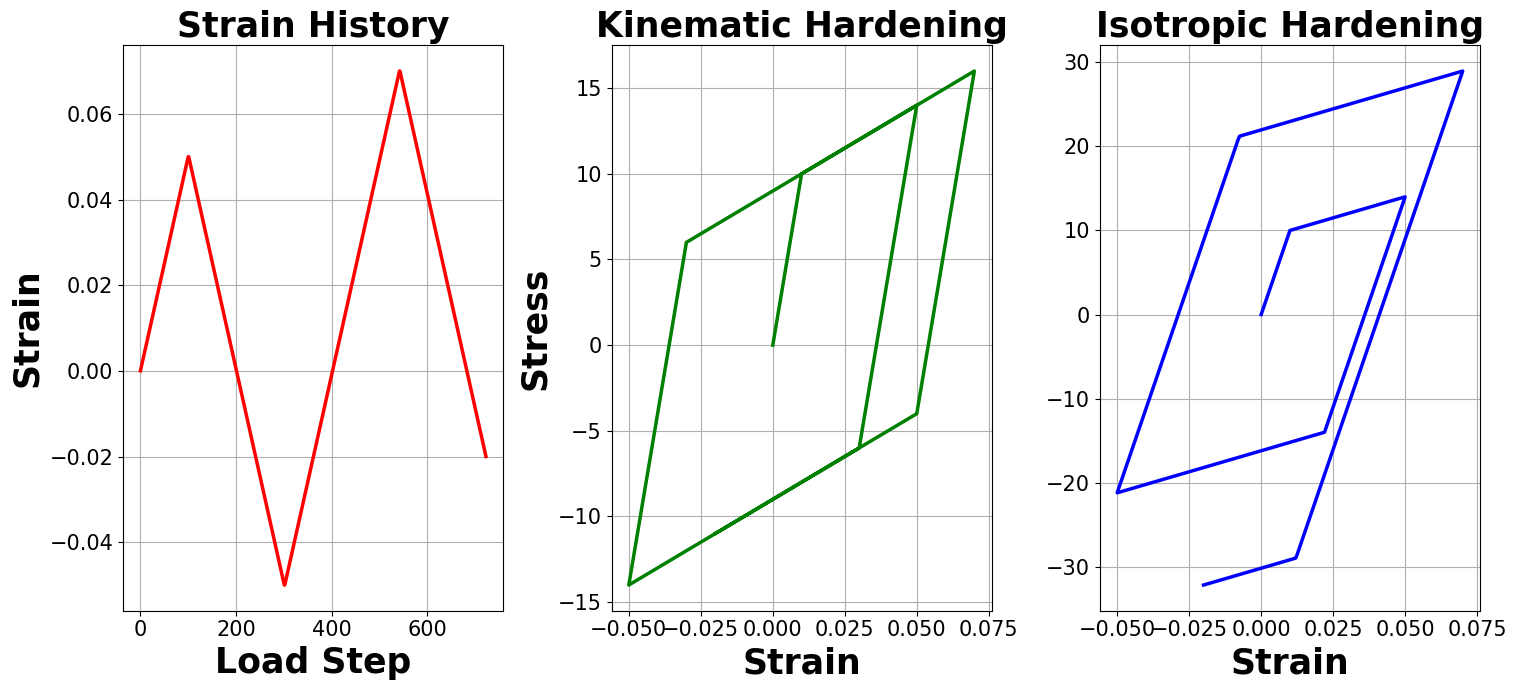

In [ ]:
strain_field = np.concatenate([
    np.linspace(0, 0.05, 101),  # First loading phase
    np.linspace(0.05, -0.05, 201),  # First unloading phase
    np.linspace(-0.05, 0.07, 241),  # Second loading phase
    np.linspace(0.07, -0.02, 181),  # Second unloading phase
])

# Initialize models
kin_model = ep.ElastoPlasticKinematic(E=1000, Et=100, sigma_y=10)
iso_model = ep.ElastoPlasticIsotropic(E=1000, Et=100, sigma_y=10)

strain_increments = np.diff(strain_field, prepend=0)

# Step by step increase in strain
for delta_eps in strain_increments:
    kin_model.update_step(delta_eps)
    iso_model.update_step(delta_eps)

# Plotting the strain history and the variation of stress vs strain for different models.
ep.plot_stress_strain(kin_model, iso_model)

## Example 2: Negative strains of example 1

We take the negative of strain vs load from example 1 to demonstrate that models work other way round as well.

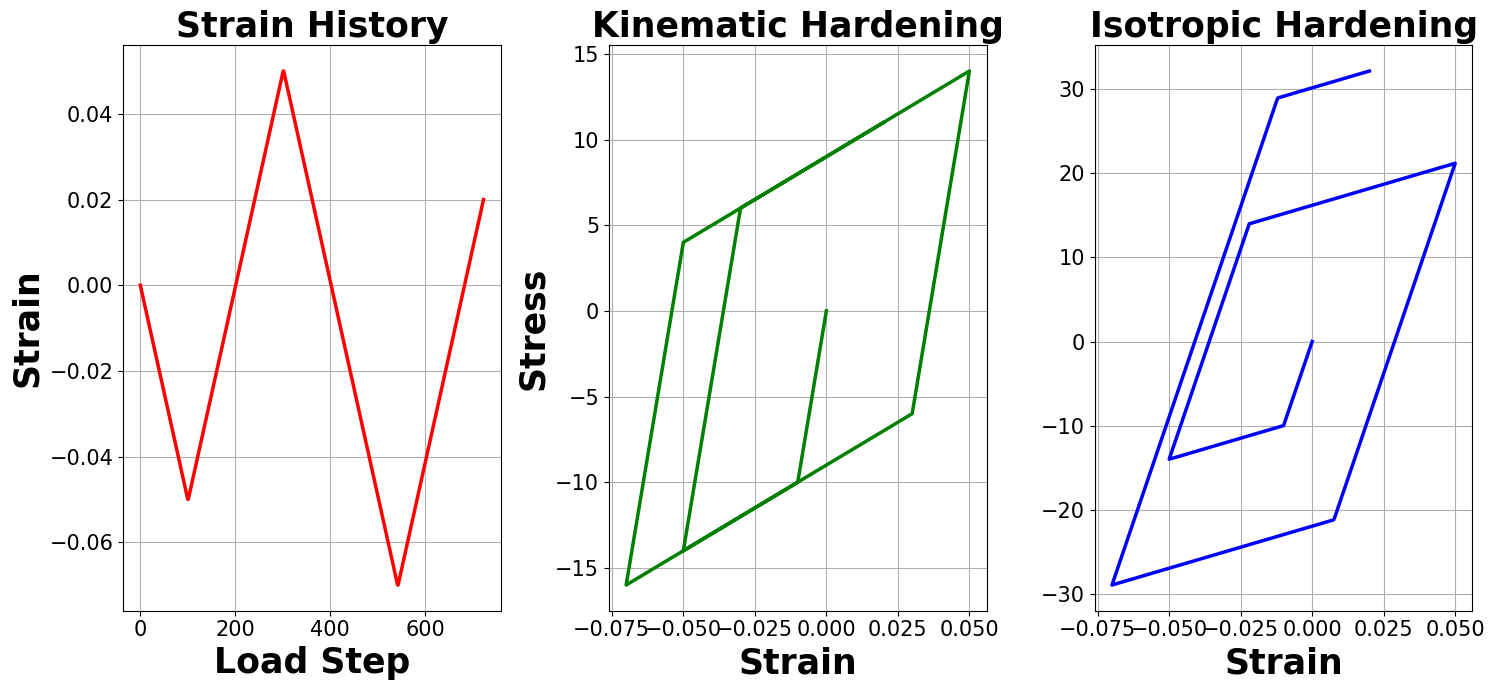

In [ ]:
strain_field = np.concatenate([
    np.linspace(0, -0.05, 101),  # First loading phase
    np.linspace(-0.05, 0.05, 201),  # First unloading phase
    np.linspace(0.05, -0.07, 241),  # Second loading phase
    np.linspace(-0.07, 0.02, 181),  # Second unloading phase
])

# Initialize models
kin_model = ep.ElastoPlasticKinematic(E=1000, Et=100, sigma_y=10)
iso_model = ep.ElastoPlasticIsotropic(E=1000, Et=100, sigma_y=10)

strain_increments = np.diff(strain_field, prepend=0)

# Step by step increase in strain
for delta_eps in strain_increments:
    kin_model.update_step(delta_eps)
    iso_model.update_step(delta_eps)

# Plotting the strain history and the variation of stress vs strain for different models.
ep.plot_stress_strain(kin_model, iso_model)

## Example 3: Sinusoidal strain

We take strain field as a linear function of $\sin{x}$.

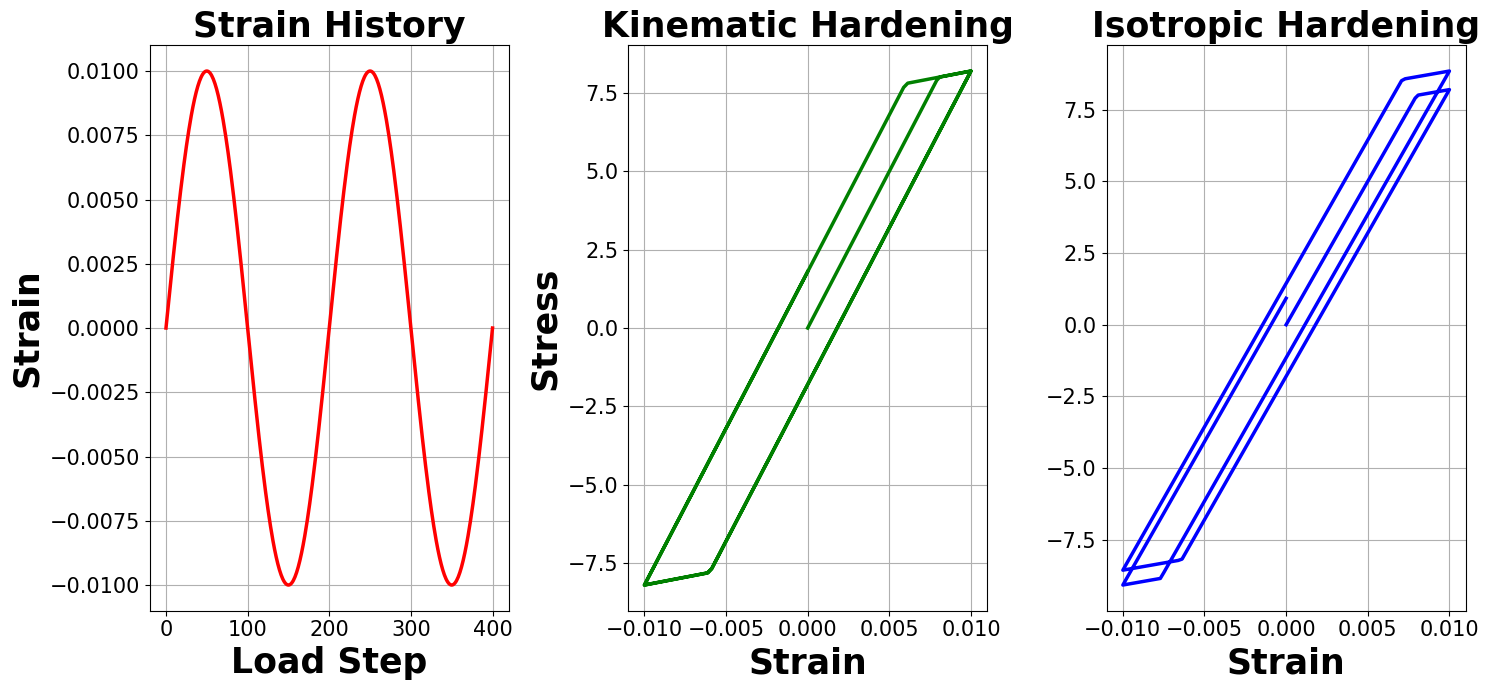

In [ ]:
x = np.linspace(0, 4*np.pi, 401)
strain_field = 0.01*np.sin(x)

# Initialize models
kin_model = ep.ElastoPlasticKinematic(E=1000, Et=100, sigma_y=8)
iso_model = ep.ElastoPlasticIsotropic(E=1000, Et=100, sigma_y=8)

strain_increments = np.diff(strain_field, prepend=0)

# Step by step increase in strain
for delta_eps in strain_increments:
    kin_model.update_step(delta_eps)
    iso_model.update_step(delta_eps)

# Plotting the strain history and the variation of stress vs strain for different models.
ep.plot_stress_strain(kin_model, iso_model)

## Example 4: Modulated Sinusoidal Strain

Strain field is taken of the form of $x*\sin{x}$.

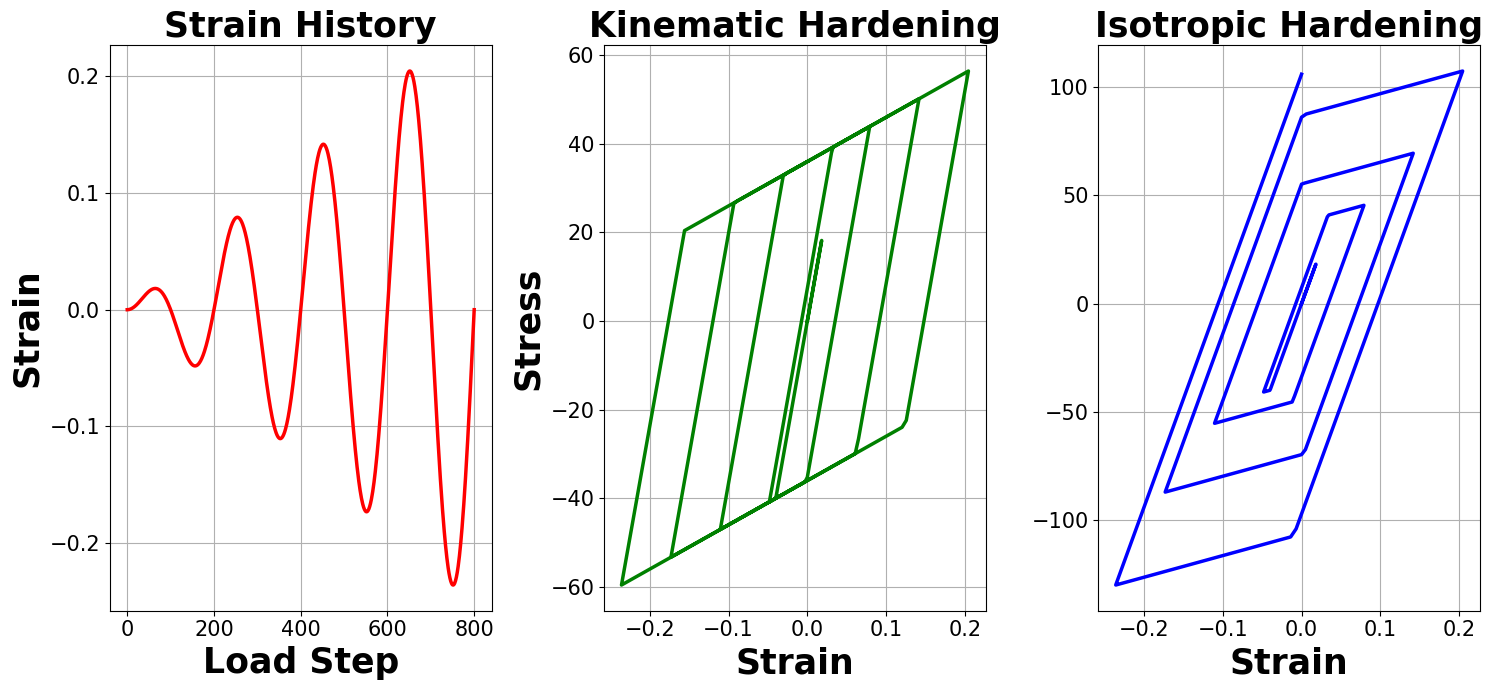

In [ ]:
x = np.linspace(0, 8*np.pi, 801)
strain_field = 0.01*x*np.sin(x)

# Initialize models
kin_model = ep.ElastoPlasticKinematic(E=1000, Et=100, sigma_y=40)
iso_model = ep.ElastoPlasticIsotropic(E=1000, Et=100, sigma_y=40)

strain_increments = np.diff(strain_field, prepend=0)

# Step by step increase in strain
for delta_eps in strain_increments:
    kin_model.update_step(delta_eps)
    iso_model.update_step(delta_eps)

# Plotting the strain history and the variation of stress vs strain for different models.
ep.plot_stress_strain(kin_model, iso_model)

## Example 5: Exponential loading and unloading

Strain increases from 0 to 0.05, then decreases to 0, then to -0.5 and finally increases to 0. All of these steps are taken in the form of exponential functions.

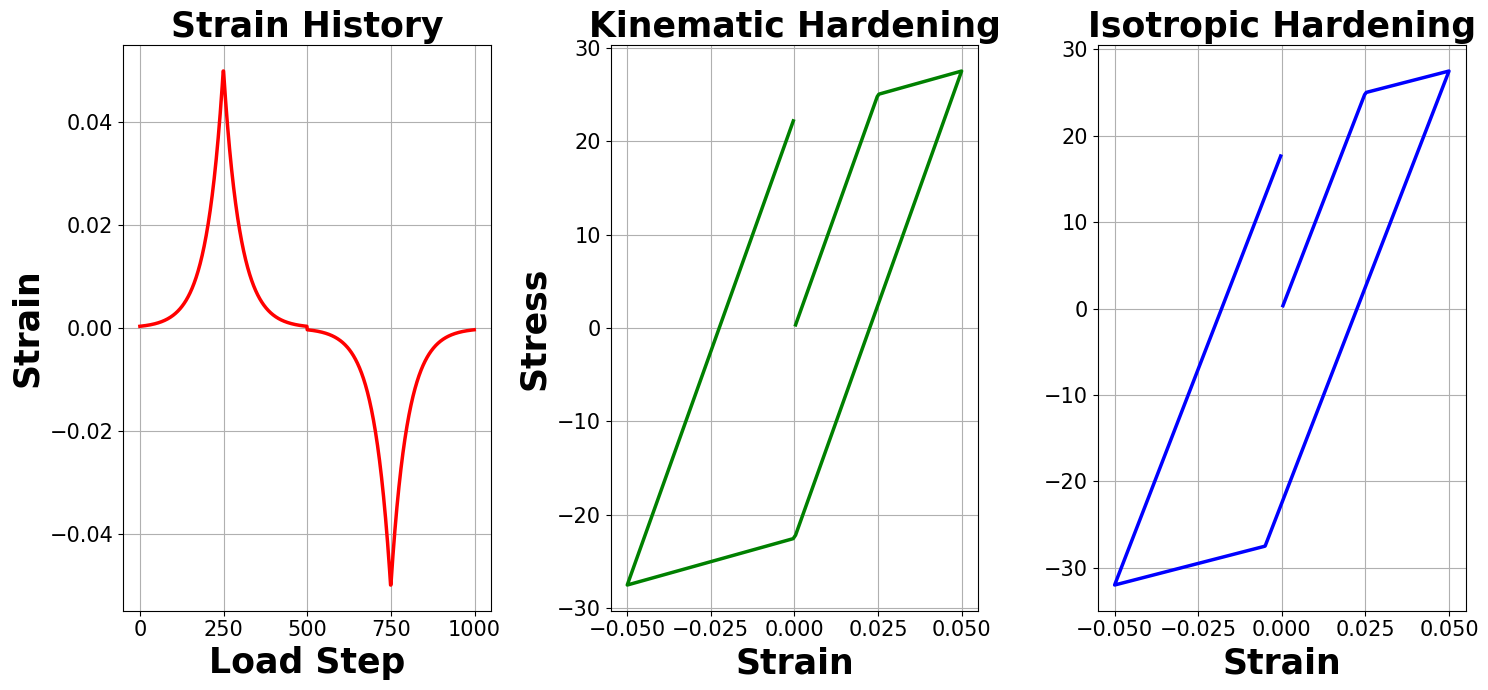

In [ ]:
x1 = np.linspace(0, 1, 250)
x2 = np.linspace(1, 2, 250)
x3 = np.linspace(2, 3, 250)
x4 = np.linspace(3, 4, 250)

# Define the y values for each segment using exponential functions
k = 5
y2 = 0.05 * np.exp(-k * (x2 - 1))
y1 = y2[::-1] 

y4 = -0.05 * np.exp(-k * (x4 - 3))
y3 = y4[::-1] 

strain_field = np.concatenate([y1, y2, y3, y4])

# Initialize models
kin_model = ep.ElastoPlasticKinematic(E=1000, Et=100, sigma_y=25)
iso_model = ep.ElastoPlasticIsotropic(E=1000, Et=100, sigma_y=25)

strain_increments = np.diff(strain_field, prepend=0)

# Step by step increase in strain
for delta_eps in strain_increments:
    kin_model.update_step(delta_eps)
    iso_model.update_step(delta_eps)

# Plotting the strain history and the variation of stress vs strain for different models.
ep.plot_stress_strain(kin_model, iso_model)